In [1663]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [1594]:
herodata = pd.read_csv('Cleaned_Hero_Dataset.csv')

In [1595]:
herodata.shape

(124, 1)

In [1596]:
herodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                       --------------  ----- 
 0   Hero Name;Win Rate (%);Popularity (%);Ban Rate (%);Hero ID;Roles;Specialties;Recommended Lane;Release year;Tier;Meta;Difficulty;Durabilit

In [1597]:
split_columns = herodata['Hero Name;Win Rate (%);Popularity (%);Ban Rate (%);Hero ID;Roles;Specialties;Recommended Lane;Release year;Tier;Meta;Difficulty;Durability Rating;Ability Effects Rating;Offense Rating;Scaling Rating;Cooldown Rating;Item Dependency Rating;Mobility Rating;Crowd Control Rating;Base Stats Growth Rating;Ultimate Impact Rating;Column1;Gameplay;Sinergi'].str.split(';', expand=True)

In [1598]:
column_names = [
    'Hero Name', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)', 'Hero ID', 'Roles', 
    'Specialties', 'Recommended Lane', 'Release year', 'Tier', 'Meta', 'Difficulty', 
    'Durability Rating', 'Ability Effects Rating', 'Offense Rating', 'Scaling Rating', 
    'Cooldown Rating', 'Item Dependency Rating', 'Mobility Rating', 'Crowd Control Rating', 
    'Base Stats Growth Rating', 'Ultimate Impact Rating', 'Column1', 'Gameplay', 'Sinergi'
]

In [1599]:
split_columns.columns = column_names

In [1600]:
herodata = pd.concat([herodata, split_columns], axis=1)

In [1601]:
herodata.drop(columns=['Hero Name;Win Rate (%);Popularity (%);Ban Rate (%);Hero ID;Roles;Specialties;Recommended Lane;Release year;Tier;Meta;Difficulty;Durability Rating;Ability Effects Rating;Offense Rating;Scaling Rating;Cooldown Rating;Item Dependency Rating;Mobility Rating;Crowd Control Rating;Base Stats Growth Rating;Ultimate Impact Rating;Column1;Gameplay;Sinergi'], inplace=True)

In [1602]:
herodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Hero Name                 124 non-null    object
 1   Win Rate (%)              124 non-null    object
 2   Popularity (%)            124 non-null    object
 3   Ban Rate (%)              124 non-null    object
 4   Hero ID                   124 non-null    object
 5   Roles                     124 non-null    object
 6   Specialties               124 non-null    object
 7   Recommended Lane          124 non-null    object
 8   Release year              124 non-null    object
 9   Tier                      124 non-null    object
 10  Meta                      124 non-null    object
 11  Difficulty                124 non-null    object
 12  Durability Rating         124 non-null    object
 13  Ability Effects Rating    124 non-null    object
 14  Offense Rating            

In [1603]:
herodata.isnull().sum()

Hero Name                   0
Win Rate (%)                0
Popularity (%)              0
Ban Rate (%)                0
Hero ID                     0
Roles                       0
Specialties                 0
Recommended Lane            0
Release year                0
Tier                        0
Meta                        0
Difficulty                  0
Durability Rating           0
Ability Effects Rating      0
Offense Rating              0
Scaling Rating              0
Cooldown Rating             0
Item Dependency Rating      0
Mobility Rating             0
Crowd Control Rating        0
Base Stats Growth Rating    0
Ultimate Impact Rating      0
Column1                     0
Gameplay                    0
Sinergi                     0
dtype: int64

In [1604]:
herodata.head(10)

,Hero Name,Win Rate (%),Popularity (%),Ban Rate (%),Hero ID,Roles,Specialties,Recommended Lane,Release year,Tier,Meta,Difficulty,Durability Rating,Ability Effects Rating,Offense Rating,Scaling Rating,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating,Column1,Gameplay,Sinergi
0,Lolita,5809,25,81,1,Support/Tank,Guard/Crowd Control,Roaming,2016,C,N,Mudah,Keras,Sakit,Tidak Sakit,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Mid Game,UBE,Setplay,5
1,Hylos,5604,32,26,2,Tank,Guard,Roaming,2017,C,N,Mudah,Sangat Keras,Sakit,Normal,Moderate,Moderate,Moderate,Moderate,High,High,Mid Game,Tabrak,UBE,5
2,Floryn,5588,57,466,3,Support,Poke,Roaming,2021,A,Y,Mudah,Lembek,Sakit,Tidak Sakit,Moderate,Moderate,Moderate,Moderate,High,High,Support,UBE,UBE,5
3,Argus,557,49,117,4,Fighter,Charge,EXP Lane,2017,C,N,Mudah,Lembek,Tidak Sakit,Normal,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Mid Game,Ciki,Ciki,5
4,Harith,555,102,3694,5,Mage,Chase,Mid Lane/Gold Lane,2018,SS,Y,Sulit,Sedang,Tidak Sakit,Sakit,Moderate,Fast,Moderate,High,Moderate,Moderate,All Game Phases,Tabrak,Setplay,5
5,Barats,5496,78,3058,6,Tank/Fighter,Damage/Crowd Control,Jungling,2020,SS,Y,Mudah,Sangat Keras,Sakit,Tidak Sakit,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,All Game Phases,Tabrak,Setplay,5
6,Edith,5453,48,34,7,Tank/Marksman,Control/Burst,EXP Lane/Roaming,2021,A,Y,Sedang,Keras,Sakit,Tidak Sakit,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Mid Game,Tabrak,Setplay,5
7,Gatotkaca,5428,165,293,8,Tank/Fighter,Crowd Control/Burst,Roaming/EXP Lane,2017,D,N,Mudah,Keras,Sakit,Tidak Sakit,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Mid Game,Tabrak,Setplay,5
8,Belerick,5425,81,464,9,Tank,Crowd Control,Roaming,2018,C,N,Mudah,Sangat Keras,Sakit,Normal,Moderate,Moderate,Moderate,Moderate,High,High,Mid Game,Tabrak,Tabrak,5
9,Moskov,5422,283,1842,10,Marksman,Finisher,Gold Lane,2017,A,Y,Sedang,Lembek,Tidak Sakit,Normal,High,Moderate,High,Moderate,Moderate,Moderate,Late Game,UBE,Setplay,5


In [1605]:
herodata['Ultimate Impact Rating'].unique()

array(['Mid Game', 'Support', 'All Game Phases', 'Late Game',
       'Early Game'], dtype=object)

In [1606]:
herodata.columns

Index(['Hero Name', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)',
       'Hero ID', 'Roles', 'Specialties', 'Recommended Lane', 'Release year',
       'Tier', 'Meta', 'Difficulty', 'Durability Rating',
       'Ability Effects Rating', 'Offense Rating', 'Scaling Rating',
       'Cooldown Rating', 'Item Dependency Rating', 'Mobility Rating',
       'Crowd Control Rating', 'Base Stats Growth Rating',
       'Ultimate Impact Rating', 'Column1', 'Gameplay', 'Sinergi'],
      dtype='object')

In [1607]:
herodataEncoded = herodata[['Scaling Rating',
       'Cooldown Rating', 'Item Dependency Rating', 'Mobility Rating',
       'Crowd Control Rating', 'Base Stats Growth Rating']]

In [1608]:
labelEncoder = LabelEncoder()

for col in herodataEncoded.columns:
    herodataEncoded[col] = labelEncoder.fit_transform(herodataEncoded[col])

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_7844\2696397973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herodataEncoded[col] = labelEncoder.fit_transform(herodataEncoded[col])
C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_7844\2696397973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herodataEncoded[col] = labelEncoder.fit_transform(herodataEncoded[col])
C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_7844\2696397973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [1609]:
herodataEncoded

,Scaling Rating,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating
0,1,1,1,1,1,1
1,1,1,1,1,0,0
2,1,1,1,1,0,0
3,1,1,1,1,1,1
4,1,0,1,0,1,1
...,...,...,...,...,...,...
119,1,1,1,1,1,1
120,1,0,1,0,1,1
121,1,1,1,1,1,1
122,0,0,0,0,1,1


In [1610]:
encoder = OneHotEncoder(sparse=False)
oneCol = encoder.fit_transform(herodata[['Ultimate Impact Rating']])

c:\Users\Akmal Fauzan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1611]:
encoded_columns = encoder.get_feature_names_out(['Ultimate Impact Rating'])

In [1612]:
oneCol = pd.DataFrame(oneCol, columns=encoded_columns)

In [1613]:
sortedCol =  herodata[['Hero Name', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)']]

In [1614]:
fitur = pd.concat([sortedCol, herodataEncoded, oneCol], axis=1)

In [1615]:
fitur.head()

,Hero Name,Win Rate (%),Popularity (%),Ban Rate (%),Scaling Rating,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support
0,Lolita,5809,25,81,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0
1,Hylos,5604,32,26,1,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0
2,Floryn,5588,57,466,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1.0
3,Argus,557,49,117,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0
4,Harith,555,102,3694,1,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0


In [1616]:
fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Hero Name                               124 non-null    object 
 1   Win Rate (%)                            124 non-null    object 
 2   Popularity (%)                          124 non-null    object 
 3   Ban Rate (%)                            124 non-null    object 
 4   Scaling Rating                          124 non-null    int32  
 5   Cooldown Rating                         124 non-null    int32  
 6   Item Dependency Rating                  124 non-null    int32  
 7   Mobility Rating                         124 non-null    int32  
 8   Crowd Control Rating                    124 non-null    int32  
 9   Base Stats Growth Rating                124 non-null    int32  
 10  Ultimate Impact Rating_All Game Phases  124 non-null    float6

In [1617]:
fitur[['Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)']] = fitur[['Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)']].astype(float) / 100

In [1618]:
fitur.head(10)

,Hero Name,Win Rate (%),Popularity (%),Ban Rate (%),Scaling Rating,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support
0,Lolita,58.09,0.25,0.81,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0
1,Hylos,56.04,0.32,0.26,1,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0
2,Floryn,55.88,0.57,4.66,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1.0
3,Argus,5.57,0.49,1.17,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0
4,Harith,5.55,1.02,36.94,1,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0
5,Barats,54.96,0.78,30.58,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0
6,Edith,54.53,0.48,0.34,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0
7,Gatotkaca,54.28,1.65,2.93,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0
8,Belerick,54.25,0.81,4.64,1,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0
9,Moskov,54.22,2.83,18.42,0,1,0,1,1,1,0.0,0.0,1.0,0.0,0.0


In [1619]:
fitur.describe()

,Win Rate (%),Popularity (%),Ban Rate (%),Scaling Rating,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.239355,0.687097,6.816210,0.750000,0.830645,0.750000,0.830645,0.879032,0.879032,0.112903,0.096774,0.137097,0.620968,0.032258
std,12.673886,0.619815,13.070101,0.434769,0.376587,0.434769,0.376587,0.327413,0.327413,0.317758,0.296849,0.345345,0.487114,0.177401
min,0.470000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.922500,0.250000,0.340000,0.750000,1.000000,0.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.570000,0.555000,1.165000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.337500,0.910000,4.645000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,58.090000,2.850000,62.630000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1620]:
def calculateStrength(row):
    
    # Bobot untuk setiap kategori
    weights = {
        'Win Rate': 0.3,
        'Popularity': 0.1,
        'Ban Rate': 0.1,
        'Scaling': 0.05,
        'Cooldown': 0.05,
        'Item Dependency': 0.05,
        'Mobility': 0.05,
        'Crowd Control': 0.05,
        'Base Stats Growth': 0.05,
        'Ultimate Impact All Phases': 0.05,
        'Ultimate Impact Early Game': 0.03,
        'Ultimate Impact Late Game': 0.03,
        'Ultimate Impact Mid Game': 0.03,
        'Ultimate Impact Support': 0.03
    }
    
    # Normalisasi dan perhitungan
    strength = (
        row['Win Rate (%)'] / 100 * weights['Win Rate'] +
        row['Popularity (%)'] * weights['Popularity'] +
        row['Ban Rate (%)'] / 100 * weights['Ban Rate'] +
        row['Scaling Rating'] * weights['Scaling'] +
        row['Cooldown Rating'] * weights['Cooldown'] +
        row['Item Dependency Rating'] * weights['Item Dependency'] +
        row['Mobility Rating'] * weights['Mobility'] +
        row['Crowd Control Rating'] * weights['Crowd Control'] +
        row['Base Stats Growth Rating'] * weights['Base Stats Growth'] +
        row['Ultimate Impact Rating_All Game Phases'] * weights['Ultimate Impact All Phases'] +
        row['Ultimate Impact Rating_Early Game'] * weights['Ultimate Impact Early Game'] +
        row['Ultimate Impact Rating_Late Game'] * weights['Ultimate Impact Late Game'] +
        row['Ultimate Impact Rating_Mid Game'] * weights['Ultimate Impact Mid Game'] +
        row['Ultimate Impact Rating_Support'] * weights['Ultimate Impact Support']
    ) * 100  
    
    return round(strength, 2)

In [1621]:
fitur['Strength Rating (%)'] = fitur.apply(calculateStrength, axis=1)
fitur = fitur.sort_values('Strength Rating (%)', ascending=False)

In [1622]:
fitur

,Hero Name,Win Rate (%),Popularity (%),Ban Rate (%),Scaling Rating,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support,Strength Rating (%)
79,Nana,49.14,2.51,54.96,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0,78.34
9,Moskov,54.22,2.83,18.42,0,1,0,1,1,1,0.0,0.0,1.0,0.0,0.0,69.41
27,Vexana,5.17,2.85,39.78,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,69.03
28,Roger,51.62,1.87,18.07,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0,68.99
7,Gatotkaca,54.28,1.65,2.93,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0,66.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Hayabusa,46.72,0.54,1.11,0,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0,32.53
35,Diggie,5.13,0.03,38.05,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1.0,28.64
116,Joy,44.86,0.09,2.02,0,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0,27.56
122,Wanwan,42.49,0.17,0.42,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,27.49


In [1623]:
fitur.insert(1, 'Role', herodata['Roles'])

In [1624]:
fitur.to_csv('list Hero.csv', index=False)

In [1625]:
fitur.columns

Index(['Hero Name', 'Role', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)',
       'Scaling Rating', 'Cooldown Rating', 'Item Dependency Rating',
       'Mobility Rating', 'Crowd Control Rating', 'Base Stats Growth Rating',
       'Ultimate Impact Rating_All Game Phases',
       'Ultimate Impact Rating_Early Game', 'Ultimate Impact Rating_Late Game',
       'Ultimate Impact Rating_Mid Game', 'Ultimate Impact Rating_Support',
       'Strength Rating (%)'],
      dtype='object')

In [1626]:
fitur['Role'].unique()

array(['Mage', 'Marksman', 'Fighter/Marksman', 'Tank/Fighter',
       'Fighter/Assassin', 'Fighter', 'Tank/Support', 'Tank',
       'Marksman/Assassin', 'Mage/Tank', 'Assassin/Mage', 'Tank/Marksman',
       'Fighter/Tank', 'Support/Tank', 'Support/Mage', 'Fighter/Mage',
       'Mage/Assassin', 'Support', 'Assassin', 'Marksman/Mage',
       'Support/Fighter', 'Assassin/Fighter', 'Support/Assassin'],
      dtype=object)

In [1627]:
def normalize_role(role):
    if role.startswith('Fighter'):
        return 'Fighter'
    elif role.startswith('Tank'):
        return 'Tank'
    elif role.startswith('Assassin'):
        return 'Assassin'
    elif role.startswith('Mage'):
        return 'Mage'
    elif role.startswith('Marksman'):
        return 'Marksman'
    elif role.startswith('Support'):
        return 'Support'
    return role  

fitur['Role'] = fitur['Role'].apply(normalize_role)

In [1628]:
def normalize_role(role):
    if role.startswith('Fighter'):
        return 'Exp Lane'
    elif role.startswith('Tank'):
        return 'Roam'
    elif role.startswith('Assassin'):
        return 'Jungler'
    elif role.startswith('Mage'):
        return 'Mid Laner'
    elif role.startswith('Marksman'):
        return 'Gold Laner'
    elif role.startswith('Support'):
        return 'Roam'
    return role  

fitur['Role'] = fitur['Role'].apply(normalize_role)

In [1629]:
def getHeroData(hero_name):
    heroData = fitur[fitur['Hero Name'].str.lower() == hero_name.lower()]
    if not heroData.empty:
        return heroData.iloc[0]
    else:
        return None

In [1630]:
def calculateTeamStrength(team):
    totalStrength = 0
    hero_data = {}
    for hero in team:
        data = getHeroData(hero)
        if data is not None:
            totalStrength += data['Strength Rating (%)']
            hero_data[hero] = data  
        else:
            print(f"Hero {hero} tidak ditemukan dalam dataset.")
    return totalStrength, hero_data

In [1631]:
def calculateWinPercentage(team1, team2):
    team1Strength, team1_data = calculateTeamStrength(team1)
    team2Strength, team2_data = calculateTeamStrength(team2)
    
    if team1Strength == team2Strength:
        return 50, 50, team1_data, team2_data

    totalStrength = team1Strength + team2Strength
    team1WinPercentage = (team1Strength / totalStrength) * 100
    team2WinPercentage = (team2Strength / totalStrength) * 100

    return team1WinPercentage, team2WinPercentage, team1_data, team2_data

In [1632]:
def createTeamBasedOnRoles(hero_data, excluded_heroes=[]):
    # Role baru yang digunakan untuk tim
    roles = ['Exp Lane', 'Roam', 'Mid Laner', 'Gold Laner', 'Jungler']
    team = []
    
    for role in roles:
        # Filter hero yang memiliki role yang sesuai dan tidak termasuk dalam excluded_heroes
        heroes_with_role = hero_data[hero_data['Role'].str.contains(role) & (~hero_data['Hero Name'].isin(excluded_heroes))]
        
        # Jika ada hero yang tersisa, pilih satu secara acak
        if not heroes_with_role.empty:
            selected_hero = heroes_with_role.sample(1)
            team.append(selected_hero['Hero Name'].values[0])
            excluded_heroes.append(selected_hero['Hero Name'].values[0])  
    
    return team

In [1633]:
print(fitur['Hero Name'].nunique())

124


In [1634]:
print(fitur['Role'].value_counts())

Role
Exp Lane      36
Roam          27
Mid Laner     25
Gold Laner    20
Jungler       16
Name: count, dtype: int64


In [1635]:
def generate_match_data(team1, team2, team1_data, team2_data):
    team1WinPercentage, team2WinPercentage, team1_data_processed, team2_data_processed = calculateWinPercentage(team1, team2)
    
    # Data untuk setiap hero di Tim 1
    team1_data_processed = {
        f'team1_Hero_{i+1}_Name': team1_data[hero]['Hero Name'] for i, hero in enumerate(team1)
    }
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Role': team1_data[hero]['Role'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Win_Rate': team1_data[hero]['Win Rate (%)'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Popularity': team1_data[hero]['Popularity (%)'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ban_Rate': team1_data[hero]['Ban Rate (%)'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Scaling_Rating': team1_data[hero]['Scaling Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Cooldown_Rating': team1_data[hero]['Cooldown Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Item_Dependency_Rating': team1_data[hero]['Item Dependency Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Mobility_Rating': team1_data[hero]['Mobility Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Crowd_Control_Rating': team1_data[hero]['Crowd Control Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Base_Stats_Growth_Rating': team1_data[hero]['Base Stats Growth Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_All_Game_Phases': team1_data[hero]['Ultimate Impact Rating_All Game Phases'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Early_Game': team1_data[hero]['Ultimate Impact Rating_Early Game'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Late_Game': team1_data[hero]['Ultimate Impact Rating_Late Game'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Mid_Game': team1_data[hero]['Ultimate Impact Rating_Mid Game'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Support': team1_data[hero]['Ultimate Impact Rating_Support'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Strength_Rating': team1_data[hero]['Strength Rating (%)'] for i, hero in enumerate(team1)
    })
    
    # Data untuk setiap hero di Tim 2
    team2_data_processed = {
        f'team2_Hero_{i+1}_Name': team2_data[hero]['Hero Name'] for i, hero in enumerate(team2)
    }
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Role': team2_data[hero]['Role'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Win_Rate': team2_data[hero]['Win Rate (%)'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Popularity': team2_data[hero]['Popularity (%)'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ban_Rate': team2_data[hero]['Ban Rate (%)'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Scaling_Rating': team2_data[hero]['Scaling Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Cooldown_Rating': team2_data[hero]['Cooldown Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Item_Dependency_Rating': team2_data[hero]['Item Dependency Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Mobility_Rating': team2_data[hero]['Mobility Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Crowd_Control_Rating': team2_data[hero]['Crowd Control Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Base_Stats_Growth_Rating': team2_data[hero]['Base Stats Growth Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_All_Game_Phases': team2_data[hero]['Ultimate Impact Rating_All Game Phases'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Early_Game': team2_data[hero]['Ultimate Impact Rating_Early Game'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Late_Game': team2_data[hero]['Ultimate Impact Rating_Late Game'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Mid_Game': team2_data[hero]['Ultimate Impact Rating_Mid Game'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Support': team2_data[hero]['Ultimate Impact Rating_Support'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Strength_Rating': team2_data[hero]['Strength Rating (%)'] for i, hero in enumerate(team2)
    })
    
    # Data tim 1 dan tim 2
    match_data = {**team1_data_processed, **team2_data_processed, 'Persentase_Kemenangan_Tim_1': team1WinPercentage, 'Persentase_Kemenangan_Tim_2': team2WinPercentage}
    
    return match_data

In [1636]:
matches = []
for _ in range(5000): 
    excluded_heroes_team1 = []
    excluded_heroes_team2 = []
    
    # Membuat tim 1 dengan memilih hero berdasarkan role
    team1 = createTeamBasedOnRoles(fitur, excluded_heroes_team1)
    excluded_heroes_team1.extend(team1)  # Menambahkan hero yang sudah dipilih ke excluded list tim 1
    
    # Membuat tim 2 dengan memilih hero berdasarkan role, pastikan hero tidak duplikat dengan tim 1
    team2 = createTeamBasedOnRoles(fitur, excluded_heroes_team1 + excluded_heroes_team2)
    excluded_heroes_team2.extend(team2)  # Menambahkan hero yang sudah dipilih ke excluded list tim 2
    
    # Menampilkan jumlah hero yang terpilih untuk tim 1 dan tim 2
    print(f"Team 1: {len(team1)} heroes selected.")
    print(f"Team 2: {len(team2)} heroes selected.")
    
    if len(team1) == 5 and len(team2) == 5:
        # Mendapatkan data hero untuk setiap hero yang telah dipilih dalam tim 1 dan tim 2
        team1_data = {hero: fitur[fitur['Hero Name'] == hero].iloc[0].to_dict() for hero in team1}
        team2_data = {hero: fitur[fitur['Hero Name'] == hero].iloc[0].to_dict() for hero in team2}

        match_data = generate_match_data(team1, team2, team1_data, team2_data)
        matches.append(match_data)
    else:
        print(f"Skipping match generation: Team 1 or Team 2 didn't get 5 heroes.")

Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
Team 2: 5 heroes selected.
Team 1: 5 heroes selected.
T

In [1637]:
match = pd.DataFrame(matches)

In [1638]:
match.head(10)

,team1_Hero_1_Name,team1_Hero_2_Name,team1_Hero_3_Name,team1_Hero_4_Name,team1_Hero_5_Name,team1_Hero_1_Role,team1_Hero_2_Role,team1_Hero_3_Role,team1_Hero_4_Role,team1_Hero_5_Role,team1_Hero_1_Win_Rate,team1_Hero_2_Win_Rate,team1_Hero_3_Win_Rate,team1_Hero_4_Win_Rate,team1_Hero_5_Win_Rate,team1_Hero_1_Popularity,team1_Hero_2_Popularity,team1_Hero_3_Popularity,team1_Hero_4_Popularity,team1_Hero_5_Popularity,team1_Hero_1_Ban_Rate,team1_Hero_2_Ban_Rate,team1_Hero_3_Ban_Rate,team1_Hero_4_Ban_Rate,team1_Hero_5_Ban_Rate,team1_Hero_1_Scaling_Rating,team1_Hero_2_Scaling_Rating,team1_Hero_3_Scaling_Rating,team1_Hero_4_Scaling_Rating,team1_Hero_5_Scaling_Rating,team1_Hero_1_Cooldown_Rating,team1_Hero_2_Cooldown_Rating,team1_Hero_3_Cooldown_Rating,team1_Hero_4_Cooldown_Rating,team1_Hero_5_Cooldown_Rating,team1_Hero_1_Item_Dependency_Rating,team1_Hero_2_Item_Dependency_Rating,team1_Hero_3_Item_Dependency_Rating,team1_Hero_4_Item_Dependency_Rating,team1_Hero_5_Item_Dependency_Rating,team1_Hero_1_Mobility_Rating,team1_Hero_2_Mobility_Rating,team1_Hero_3_Mobility_Rating,team1_Hero_4_Mobility_Rating,team1_Hero_5_Mobility_Rating,team1_Hero_1_Crowd_Control_Rating,team1_Hero_2_Crowd_Control_Rating,team1_Hero_3_Crowd_Control_Rating,team1_Hero_4_Crowd_Control_Rating,team1_Hero_5_Crowd_Control_Rating,team1_Hero_1_Base_Stats_Growth_Rating,team1_Hero_2_Base_Stats_Growth_Rating,team1_Hero_3_Base_Stats_Growth_Rating,team1_Hero_4_Base_Stats_Growth_Rating,team1_Hero_5_Base_Stats_Growth_Rating,team1_Hero_1_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_2_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_3_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_4_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_5_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_1_Ultimate_Impact_Rating_Early_Game,team1_Hero_2_Ultimate_Impact_Rating_Early_Game,team1_Hero_3_Ultimate_Impact_Rating_Early_Game,team1_Hero_4_Ultimate_Impact_Rating_Early_Game,team1_Hero_5_Ultimate_Impact_Rating_Early_Game,team1_Hero_1_Ultimate_Impact_Rating_Late_Game,team1_Hero_2_Ultimate_Impact_Rating_Late_Game,team1_Hero_3_Ultimate_Impact_Rating_Late_Game,team1_Hero_4_Ultimate_Impact_Rating_Late_Game,team1_Hero_5_Ultimate_Impact_Rating_Late_Game,team1_Hero_1_Ultimate_Impact_Rating_Mid_Game,team1_Hero_2_Ultimate_Impact_Rating_Mid_Game,team1_Hero_3_Ultimate_Impact_Rating_Mid_Game,team1_Hero_4_Ultimate_Impact_Rating_Mid_Game,team1_Hero_5_Ultimate_Impact_Rating_Mid_Game,team1_Hero_1_Ultimate_Impact_Rating_Support,team1_Hero_2_Ultimate_Impact_Rating_Support,team1_Hero_3_Ultimate_Impact_Rating_Support,team1_Hero_4_Ultimate_Impact_Rating_Support,team1_Hero_5_Ultimate_Impact_Rating_Support,team1_Hero_1_Strength_Rating,team1_Hero_2_Strength_Rating,team1_Hero_3_Strength_Rating,team1_Hero_4_Strength_Rating,team1_Hero_5_Strength_Rating,team2_Hero_1_Name,team2_Hero_2_Name,team2_Hero_3_Name,team2_Hero_4_Name,team2_Hero_5_Name,team2_Hero_1_Role,team2_Hero_2_Role,team2_Hero_3_Role,team2_Hero_4_Role,team2_Hero_5_Role,team2_Hero_1_Win_Rate,team2_Hero_2_Win_Rate,team2_Hero_3_Win_Rate,team2_Hero_4_Win_Rate,team2_Hero_5_Win_Rate,team2_Hero_1_Popularity,team2_Hero_2_Popularity,team2_Hero_3_Popularity,team2_Hero_4_Popularity,team2_Hero_5_Popularity,team2_Hero_1_Ban_Rate,team2_Hero_2_Ban_Rate,team2_Hero_3_Ban_Rate,team2_Hero_4_Ban_Rate,team2_Hero_5_Ban_Rate,team2_Hero_1_Scaling_Rating,team2_Hero_2_Scaling_Rating,team2_Hero_3_Scaling_Rating,team2_Hero_4_Scaling_Rating,team2_Hero_5_Scaling_Rating,team2_Hero_1_Cooldown_Rating,team2_Hero_2_Cooldown_Rating,team2_Hero_3_Cooldown_Rating,team2_Hero_4_Cooldown_Rating,team2_Hero_5_Cooldown_Rating,team2_Hero_1_Item_Dependency_Rating,team2_Hero_2_Item_Dependency_Rating,team2_Hero_3_Item_Dependency_Rating,team2_Hero_4_Item_Dependency_Rating,team2_Hero_5_Item_Dependency_Rating,team2_Hero_1_Mobility_Rating,team2_Hero_2_Mobility_Rating,team2_Hero_3_Mobility_Rating,team2_Hero_4_Mobility_Rating,team2_Hero_5_Mobility_Rating,team2_Hero_1_Crowd_Control_Rating,team2_Hero_2_Crowd_Control_Rat

In [1639]:
def labelResult(row):
    if row['Persentase_Kemenangan_Tim_1'] > row['Persentase_Kemenangan_Tim_2']:
        return 'Menang'
    elif row['Persentase_Kemenangan_Tim_1'] < row['Persentase_Kemenangan_Tim_2']:
        return 'Kalah'
    else:
        return 'Seri'

In [1640]:
match['result'] = match.apply(labelResult, axis=1)

In [1641]:
match['result'].value_counts()

result
Menang    2544
Kalah     2456
Name: count, dtype: int64

In [1642]:
pd.set_option('display.max_columns', None)

In [1644]:
match.to_csv('match history.csv', index=False)

In [1645]:
team1 = ['Lolita', 'Harith', 'Vexana', 'Gatotkaca', 'Hayabusa']
team2 = ['Hylos', 'Ling', 'Edith', 'Moskov', 'Xavier']

In [1646]:
team1WinPercentage, team2WinPercentage, team1, team2 = calculateWinPercentage(team1, team2)

In [1647]:
# print(f"Tim 1: {team1}")
# print(f"Tim 2: {team2}")
print(f"Persentase kemenangan Tim 1: {team1WinPercentage:.2f}%")
print(f"Persentase kemenangan Tim 2: {team2WinPercentage:.2f}%")

Persentase kemenangan Tim 1: 49.51%
Persentase kemenangan Tim 2: 50.49%


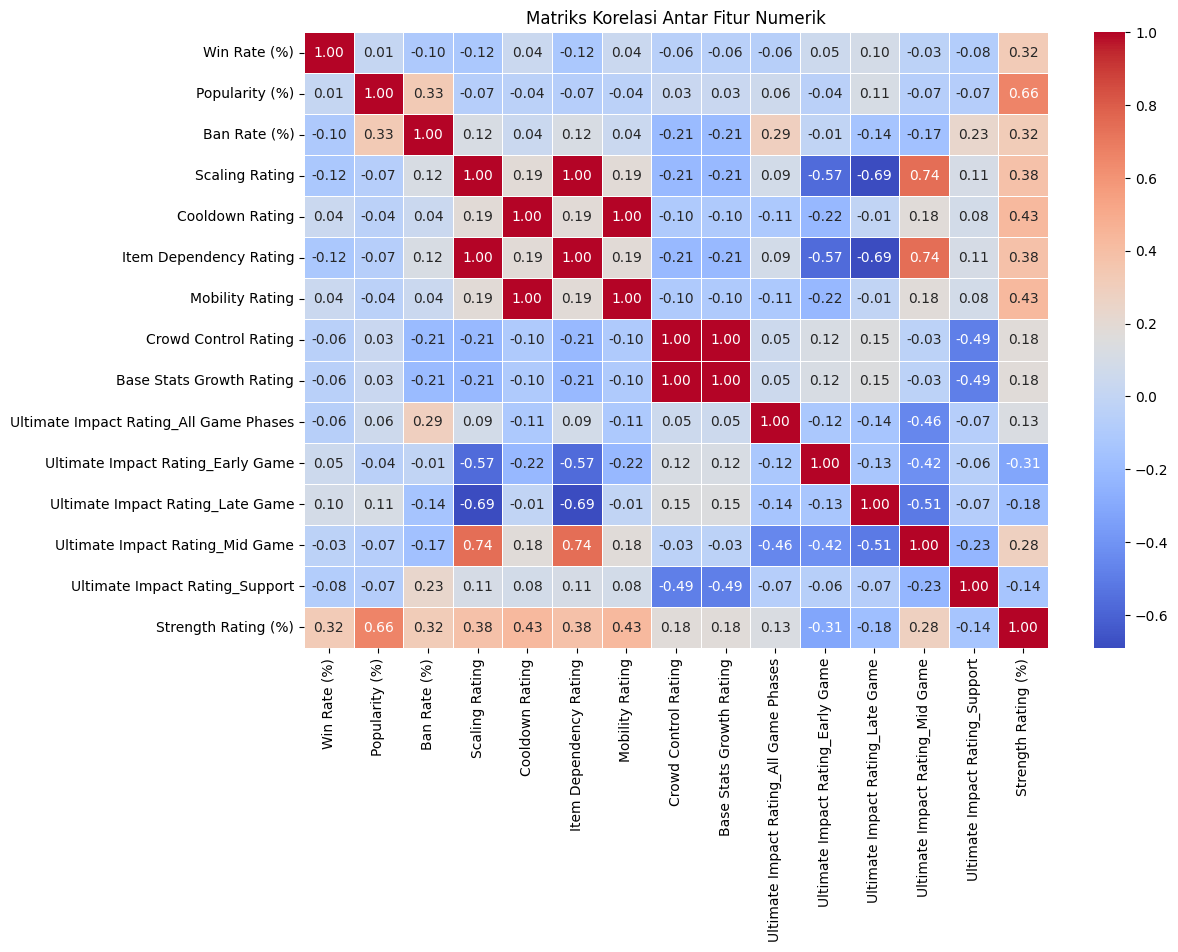

In [1649]:
numerical_features = fitur.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

In [1650]:
filtered_corr = correlation_matrix[correlation_matrix > 0.5]

In [1651]:
filtered_corr.index

Index(['Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)', 'Scaling Rating',
       'Cooldown Rating', 'Item Dependency Rating', 'Mobility Rating',
       'Crowd Control Rating', 'Base Stats Growth Rating',
       'Ultimate Impact Rating_All Game Phases',
       'Ultimate Impact Rating_Early Game', 'Ultimate Impact Rating_Late Game',
       'Ultimate Impact Rating_Mid Game', 'Ultimate Impact Rating_Support',
       'Strength Rating (%)'],
      dtype='object')

In [1658]:
match.columns

Index(['team1_Hero_1_Name', 'team1_Hero_2_Name', 'team1_Hero_3_Name',
       'team1_Hero_4_Name', 'team1_Hero_5_Name', 'team1_Hero_1_Role',
       'team1_Hero_2_Role', 'team1_Hero_3_Role', 'team1_Hero_4_Role',
       'team1_Hero_5_Role',
       ...
       'team2_Hero_4_Ultimate_Impact_Rating_Support',
       'team2_Hero_5_Ultimate_Impact_Rating_Support',
       'team2_Hero_1_Strength_Rating', 'team2_Hero_2_Strength_Rating',
       'team2_Hero_3_Strength_Rating', 'team2_Hero_4_Strength_Rating',
       'team2_Hero_5_Strength_Rating', 'Persentase_Kemenangan_Tim_1',
       'Persentase_Kemenangan_Tim_2', 'result'],
      dtype='object', length=173)

In [1659]:
features = match.select_dtypes(include=['number'])
target = match['result']

In [1662]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [1664]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [1665]:
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)

In [1666]:
X_test_pca = pca.transform(X_test_scaled)

In [1667]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [1668]:
y_pred = model.predict(X_test_pca)

In [1670]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy}")

Akurasi Model: 0.975


In [1669]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Kalah       0.96      0.98      0.97       472
      Menang       0.98      0.97      0.98       528

    accuracy                           0.97      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.97      0.98      1000



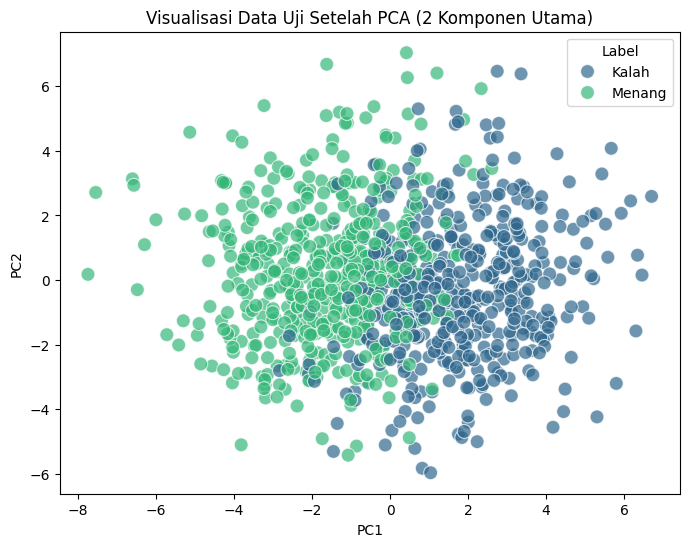

In [1671]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='viridis', s=100, alpha=0.7)

plt.title("Visualisasi Data Uji Setelah PCA (2 Komponen Utama)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Label', loc='upper right')
plt.show()